<a href="https://colab.research.google.com/github/CAUKimJisu/Deep.Learn4AI_CAU/blob/main/FinalProject/AI%EB%94%A5%EB%9F%AC%EB%8B%9D_EDA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from collections import Counter
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

In [8]:
# 'text' 열의 모든 문장을 단어로 분리하여 리스트에 저장
words = df_train['text'].str.split()

# 모든 단어를 하나의 리스트로 펼치기
all_words = [word for sublist in words for word in sublist]

# 단어 빈도수 계산
word_frequency = Counter(all_words)

# 단어 빈도수 출력
print(word_frequency)

Counter({'the': 2575, 'a': 1845, 'to': 1805, 'in': 1757, 'of': 1722, 'and': 1302, 'I': 1197, 'for': 820, 'is': 814, 'on': 773, '-': 763, 'you': 632, 'The': 552, 'my': 549, 'with': 508, 'that': 492, 'at': 485, 'by': 469, 'it': 433, 'from': 372, 'be': 371, 'was': 363, 'have': 353, 'are': 345, 'this': 335, 'like': 318, '&amp;': 295, 'A': 290, 'as': 282, 'just': 258, 'your': 254, 'up': 250, 'but': 250, 'me': 244, 'so': 239, 'not': 236, 'has': 229, 'out': 226, "I'm": 225, '??': 214, 'will': 210, 'via': 208, 'after': 206, 'an': 204, 'about': 192, 'been': 185, 'get': 183, 'or': 181, 'when': 181, 'all': 178, 'no': 178, 'into': 162, 'over': 158, 'In': 155, 'who': 150, 'we': 149, 'fire': 148, '...': 147, 'people': 146, 'they': 145, '2': 145, 'if': 143, '|': 142, 'one': 142, 'can': 141, 'i': 139, 'he': 139, 'than': 132, "don't": 128, 'more': 128, 'do': 124, 'what': 120, 'would': 116, "it's": 115, 'his': 115, 'how': 111, 'her': 111, 'This': 110, 'To': 108, 'new': 105, 'got': 103, 'now': 101, 'were

In [9]:
# 'text' 열의 모든 문장을 단어로 분리하여 리스트에 저장
words = df_test['text'].str.split()

# 모든 단어를 하나의 리스트로 펼치기
all_words = [word for sublist in words for word in sublist]

# 단어 빈도수 계산
word_frequency = Counter(all_words)

# 단어 빈도수 출력
print(word_frequency)

Counter({'the': 1045, 'to': 808, 'a': 767, 'of': 750, 'in': 739, 'and': 547, 'I': 475, 'is': 373, 'on': 336, 'for': 311, '-': 300, 'you': 274, 'my': 248, 'The': 241, 'by': 218, 'with': 196, 'it': 188, 'at': 181, 'that': 176, 'from': 169, 'are': 164, 'be': 163, 'was': 155, 'this': 144, 'like': 134, '&amp;': 134, 'as': 132, 'your': 121, 'have': 120, 'out': 110, 'A': 105, 'just': 104, 'not': 102, 'via': 98, 'up': 93, 'me': 91, 'will': 91, '??': 90, 'about': 88, 'after': 88, 'but': 87, 'so': 87, 'get': 87, 'an': 86, "I'm": 85, 'has': 83, 'all': 81, 'we': 81, 'no': 78, 'or': 76, 'when': 72, 'they': 69, '2': 68, 'would': 68, 'i': 68, 'fire': 66, 'more': 66, 'he': 66, 'who': 64, 'into': 63, 'if': 62, 'how': 62, 'his': 60, 'can': 59, 'This': 59, '|': 58, 'In': 58, 'people': 57, 'one': 55, '...': 55, "it's": 54, 'her': 53, 'been': 53, 'New': 52, 'over': 52, 'do': 50, 'To': 49, 'RT': 49, 'than': 46, 'were': 46, 'had': 46, 'what': 44, '3': 43, 'attack': 43, '????': 43, 'our': 42, 'first': 42, 'of

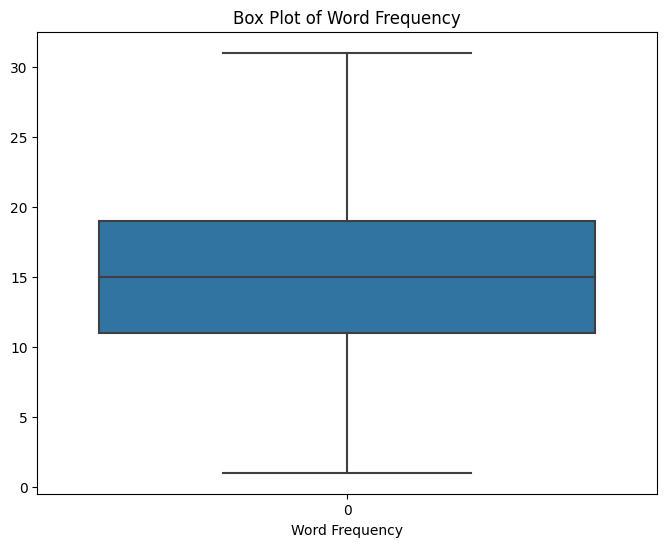

In [5]:
# 'text' 열의 문장을 단어로 분리하여 리스트에 저장
words = df_train['text'].str.split()

# 단어 빈도수 계산
word_frequency = [len(word) for word in words]

# 상자그림 그리기
plt.figure(figsize=(8, 6))  # 그림의 크기 설정
sns.boxplot(word_frequency)  # 단어 빈도수에 대한 상자그림 그리기
plt.xlabel('Word Frequency')  # x축 레이블 설정
plt.title('Box Plot of Word Frequency')  # 그래프 제목 설정
plt.show()  # 그래프 출력

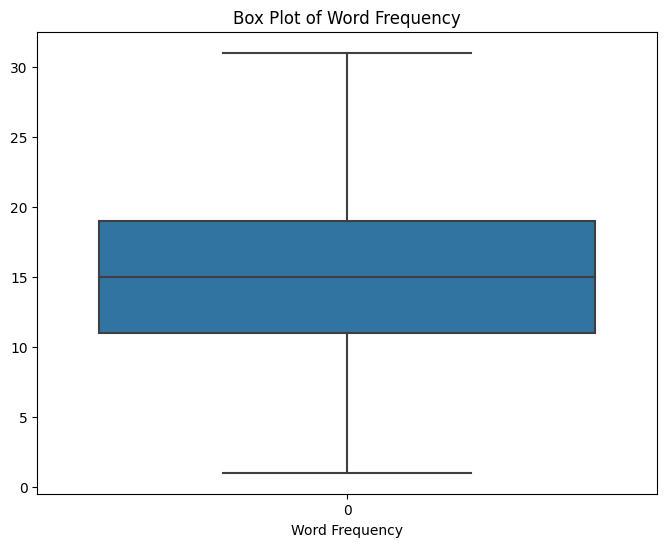

In [6]:
# 'text' 열의 문장을 단어로 분리하여 리스트에 저장
words = df_test['text'].str.split()

# 단어 빈도수 계산
word_frequency = [len(word) for word in words]

# 상자그림 그리기
plt.figure(figsize=(8, 6))  # 그림의 크기 설정
sns.boxplot(word_frequency)  # 단어 빈도수에 대한 상자그림 그리기
plt.xlabel('Word Frequency')  # x축 레이블 설정
plt.title('Box Plot of Word Frequency')  # 그래프 제목 설정
plt.show()  # 그래프 출력

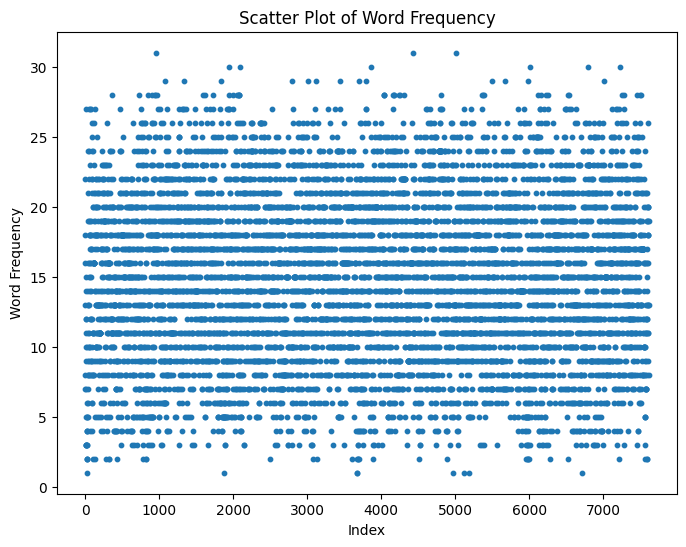

In [4]:
# 'text' 열의 문장을 단어로 분리하여 리스트에 저장
words = df_train['text'].str.split()

# 단어 빈도수 계산
word_frequency = [len(word) for word in words]

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그림의 크기 설정
plt.scatter(range(len(word_frequency)), word_frequency, s=10)  # 산점도 그리기
plt.xlabel('Index')  # x축 레이블 설정
plt.ylabel('Word Frequency')  # y축 레이블 설정
plt.title('Scatter Plot of Word Frequency')  # 그래프 제목 설정
plt.show()  # 그래프 출력

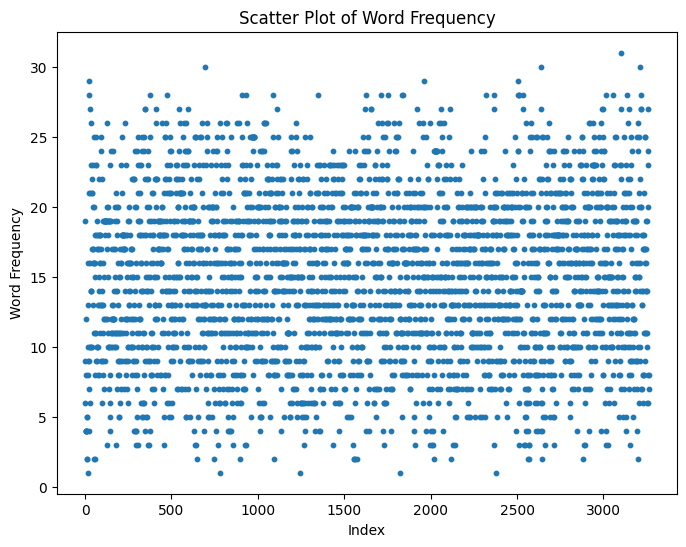

In [7]:
# 'text' 열의 문장을 단어로 분리하여 리스트에 저장
words = df_test['text'].str.split()

# 단어 빈도수 계산
word_frequency = [len(word) for word in words]

# 산점도 그리기
plt.figure(figsize=(8, 6))  # 그림의 크기 설정
plt.scatter(range(len(word_frequency)), word_frequency, s=10)  # 산점도 그리기
plt.xlabel('Index')  # x축 레이블 설정
plt.ylabel('Word Frequency')  # y축 레이블 설정
plt.title('Scatter Plot of Word Frequency')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [14]:
# 'text' 열의 모든 문장을 단어로 분리하여 리스트에 저장
words = df_train['text'].str.split()

# 모든 단어를 하나의 리스트로 펼치기
all_words = [word for sublist in words for word in sublist]

# 단어 빈도수 계산
word_frequency = Counter(all_words)

# 빈도수가 1인 단어 추출
single_frequency_words = [word for word, freq in word_frequency.items() if freq == 1]

# 단어 빈도수가 1인 단어들의 개수 확인
count_single_frequency_words = len(single_frequency_words)

# 결과 출력
print("Number of single frequency words:", count_single_frequency_words)

Number of single frequency words: 23265


In [15]:
# 'text' 열의 모든 문장을 단어로 분리하여 리스트에 저장
words = df_test['text'].str.split()

# 모든 단어를 하나의 리스트로 펼치기
all_words = [word for sublist in words for word in sublist]

# 단어 빈도수 계산
word_frequency = Counter(all_words)

# 빈도수가 1인 단어 추출
single_frequency_words = [word for word, freq in word_frequency.items() if freq == 1]

# 단어 빈도수가 1인 단어들의 개수 확인
count_single_frequency_words = len(single_frequency_words)

# 결과 출력
print("Number of single frequency words:", count_single_frequency_words)

Number of single frequency words: 12915


In [39]:
# 'text' 열의 모든 문장을 단어로 분리하여 리스트에 저장
words = df_train['text'].str.split()

# 모든 단어를 하나의 리스트로 펼치기
all_words = [word for sublist in words for word in sublist]

# 단어 빈도수 계산
word_frequency = Counter(all_words)

# 빈도수가 1인 단어 추출
single_frequency_words = [word for word, freq in word_frequency.items() if freq == 1]

# '#'로 시작하는 단어 필터링
hashtags = [word for word in single_frequency_words if re.match(r'^#', word)]

# '@'로 시작하는 단어 필터링
mentions = [word for word in single_frequency_words if re.match(r'^@', word)]

# 'http://t.co/'로 시작하는 단어 필터링
urls = [word for word in single_frequency_words if re.match(r'^http://t\.co/', word)]

# 결과 출력
print("Hashtags:", hashtags)
print("Mentions:", mentions)
print("URLs:", urls)

Hashtags: ['#CAfire', '#raining', '#TampaBay', '#Tampa', '#Flood', '#We', '#metal', '#AFRICANBAZE:', '#Bridgetown', '#Kurds', '#Diyala', '#climate', '#energy', '#NashvilleTraffic.', '#SantaClara', '#BayArea', '#Traffic', '#personalinjury', '#solicitor', '#OtleyHour', '#stlouis', '#caraccidentlawyer', '#TruckCrash', '#FortWorth', '#Ashville', '#Hagerstown', '#WHAG', '#Bahrain', '#GrowingUpSpoiled', '#WisdomWed', '#lifehacks', '#silverwood', '#aftershock', '##book', '#now', '#wdyouth', '#biblestudy', '#Horrible', '#WatchTheVideo', '#BINLADEN', '#man', '#airport', '#airplane', '#aircraft', '#aeroplane', '#runway', '#accident', '#freaky\x89Û_', '#Crash', '#Aircraft', '#Airplane', '#Pilot', '#Death', '#CarFest', '#OMG!', '#AirPlane', '#JetEngine', '#TurboJet', '#Boing', '#G90', '#RODKiai', '#EMSNe\x89Û_', '#justsaying', '#randomthought', '#DNA', '#paramedics', '#ambulance', '#worldNews', '#FantasticFour/#Fant4stic/whatever', '#LGM', '#AZ:', '#WildHorses', '#TantoNationalForest!', '#SaltRive

In [40]:
# 해시태그 개수 확인
count_hashtags = len(hashtags)

# 멘션 개수 확인
count_mentions = len(mentions)

# URL 개수 확인
count_urls = len(urls)

# 결과 출력
print("Number of hashtags:", count_hashtags)
print("Number of mentions:", count_mentions)
print("Number of URLs:", count_urls)

Number of hashtags: 1653
Number of mentions: 2114
Number of URLs: 4116


In [19]:
# 'text' 열의 모든 문장을 단어로 분리하여 리스트에 저장
words = df_test['text'].str.split()

# 모든 단어를 하나의 리스트로 펼치기
all_words = [word for sublist in words for word in sublist]

# 단어 빈도수 계산
word_frequency = Counter(all_words)

# 빈도수가 1인 단어 추출
single_frequency_words = [word for word, freq in word_frequency.items() if freq == 1]

# '#'로 시작하는 단어 필터링
hashtags = [word for word in single_frequency_words if re.match(r'^#', word)]

# '@'로 시작하는 단어 필터링
mentions = [word for word in single_frequency_words if re.match(r'^@', word)]

# 'http://t.co/'로 시작하는 단어 필터링
urls = [word for word in single_frequency_words if re.match(r'^http://t\.co/', word)]

# 결과 출력
print("Hashtags:", hashtags)
print("Mentions:", mentions)
print("URLs:", urls)

Hashtags: ['#Spokane', '#wildfires', '#PreviouslyOnDoyinTv:', '#nsfw', '#pulsradio', '#PaTurnpike', '#traffic', '#3:', '#Curse?', '#Unresolved', '#manga', '#anime', '#slipandfall', '#dogbite', '#M42', '#PG15000044357]', '#NXT!', '#gradschoolapps', '#InVahnWeTrust', '#UPDATE:', '#JFK', '#Yankees', '#RainbowPower', '#NHS', '#Ambulance', '#GayUK', '#Uniform', '#Proud', '#Privileged', '#WhatsYourEmergency', '#handplacementgoals', '#yiayplan', '#SaltRiverWildHorses', '#savewildhorses', '#saltriverhorses', '#ura', '#Apocalyptic', '#doomsday', '#prepper', '#book', '#reading', '#meerkat', '#Armageddon', '#Watchmen', '#MustRead:', '#Putin', '#Rus', '#MTVSummerStar', '#VideoVeranoMTV', '#rome', '#LGBT', '#LGBTQ', '#Gospel', '#AAPatWork', '#INDUSTRYINSIGHTS', '#mcgsecure', '#Black-haired', '#Blowjob', '#People', '#Tilly', '#Confused', '#nsfw:', '#newcastle', '#robotcoingame', '#Bitcoin', '#FreeBitcoin', '#Repost', '#ColoradoAvalanche', '#Avalanche', '#ColoradoAvs', '#NHLAvalanche', '#livingonthee

In [20]:
# 해시태그 개수 확인
count_hashtags = len(hashtags)

# 멘션 개수 확인
count_mentions = len(mentions)

# URL 개수 확인
count_urls = len(urls)

# 결과 출력
print("Number of hashtags:", count_hashtags)
print("Number of mentions:", count_mentions)
print("Number of URLs:", count_urls)

Number of hashtags: 1008
Number of mentions: 1067
Number of URLs: 1806
